In [2]:
import pandas as pd
from sklearn import tree
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix

diabetes_df = pd.read_csv("../week_13/diabetes.csv")
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = diabetes_df.drop('Outcome', axis=1)
y = diabetes_df['Outcome']

# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42, stratify=y)

#Standardize
sc= StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

In [4]:
from sklearn.ensemble import RandomForestClassifier
#estimator = model
rf = RandomForestClassifier(n_estimators=200,random_state=42)

rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.7662337662337663

In [5]:
predictions = rf.predict(X_test)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.79      0.87      0.83       150
           1       0.70      0.58      0.64        81

    accuracy                           0.77       231
   macro avg       0.75      0.72      0.73       231
weighted avg       0.76      0.77      0.76       231



In [6]:
print(rf.feature_importances_, X.columns)

[0.09291691 0.265229   0.08982683 0.07090504 0.07509956 0.15354422
 0.12056711 0.13191134] Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')


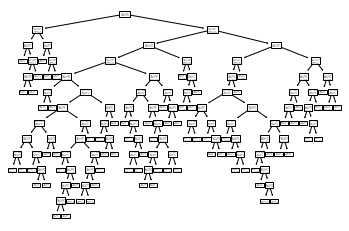

In [7]:
import matplotlib.pyplot as plt
#pull out a single tree
tree_10 = rf.estimators_[9]

tree.plot_tree(tree_10)
plt.savefig("tree.svg")
plt.show()

In [8]:
#look at the random forest documentation to improve the model
#https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

In [10]:
#XGBoost
from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb.fit(X_train, y_train)

XGBClassifier()

In [11]:
y_pred = xgb.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.85      0.82       150
           1       0.69      0.59      0.64        81

    accuracy                           0.76       231
   macro avg       0.74      0.72      0.73       231
weighted avg       0.76      0.76      0.76       231



In [17]:
from sklearn.metrics import roc_curve, roc_auc_score

#ROC curve summarize the trade-off between true positives and false positives
#ROC curves are the most appropriate for balanced datasets
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)
print(auc)

0.7298148148148148


Text(0, 0.5, 'True Positive Rate')

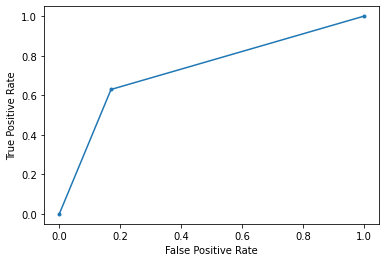

In [18]:
plt.plot(fpr, tpr, marker = '.')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

In [19]:
#precision-recall curve summarizes the trade-off between true positive
#rates and positive values. These are best for imbalance datasets
from sklearn.metrics import precision_recall_curve, f1_score, auc

precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f1)


0.6476190476190475


In [21]:
pr_auc = auc(recall, precision)
pr_auc

0.713083213083213

Text(0, 0.5, 'Precision')

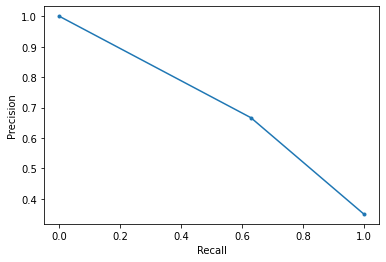

In [22]:
plt.plot(recall, precision, marker = '.')
plt.xlabel('Recall')
plt.ylabel('Precision')